<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Generation_learning_path_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel data
file_path = "/content/updated_merged_data_19102024.xlsx"
df = pd.read_excel(file_path)

# Define a function to recommend a learning path based on student progress
def recommend_learning_path(data, student_id):
    # Filter data for the specific student
    student_data = data[data['userid'] == student_id]

    # Identify topics that need attention: incomplete or low score
    # Set threshold for low score (e.g., below 70)
    threshold_score = 70
    recommended_topics = student_data[
        (student_data['attainment'] != '1') |
        (student_data['attainment'] < threshold_score)
    ]

    # Recommend learning path based on topics that need improvement
    learning_path = recommended_topics[['toolid', 'tool_weight', 'attainment', 'performance']]

    # Sort by completion status and score to prioritize weaker areas
    learning_path = learning_path.sort_values(
        by=['attainment', 'performance'],
        ascending=[True, True]
    )

    return learning_path

# Apply the recommendation function for two specific students (e.g., ID 1 and ID 2)
student_ids = [23320, 26342]
for student_id in student_ids:
    print(f"Learning Path Recommendation for Student ID: {student_id}")
    learning_path = recommend_learning_path(df, student_id)
    print(learning_path)
    print("\n")


Learning Path Recommendation for Student ID: 23320
      toolid  tool_weight  attainment  performance
821   233162       0.0990           1     0.006400
822   233162       0.0990           1     0.006400
827   233162       0.0990           1     0.006400
828   233162       0.0990           1     0.006400
1536  233162       0.0990           1     0.006400
...      ...          ...         ...          ...
5054  233140       0.0062           1     0.053265
5146  233140       0.0062           1     0.053265
5804  233140       0.0062           1     0.053265
6816  233140       0.0062           1     0.053265
6817  233140       0.0062           1     0.053265

[157 rows x 4 columns]


Learning Path Recommendation for Student ID: 26342
      toolid  tool_weight  attainment  performance
579   233162       0.0990           0     0.015200
6739  233162       0.0990           0     0.015200
6747  233162       0.0990           0     0.015200
6763  233168       0.1852           0     0.022275
6766 


Visualizations for Student ID: 23320


<ipython-input-8-c5bf20c8c7a6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


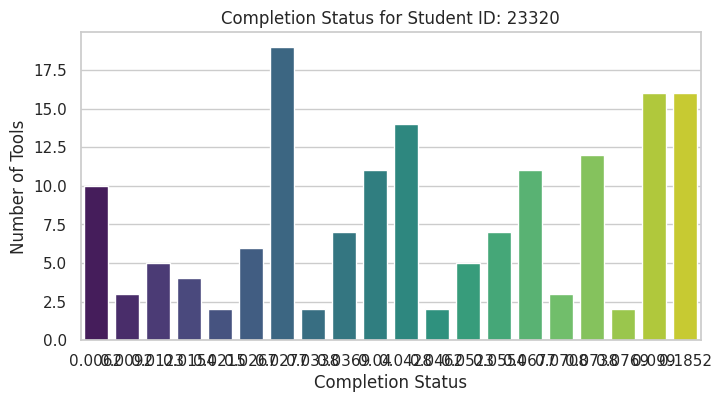


Visualizations for Student ID: 26342


<ipython-input-8-c5bf20c8c7a6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


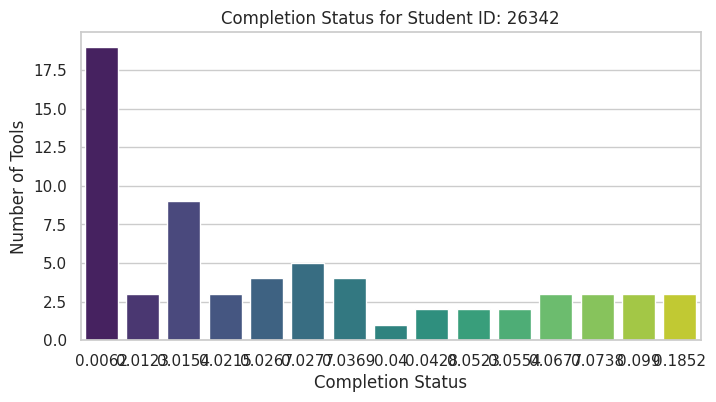

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set up visual styles
sns.set(style="whitegrid")

# Function to plot Completion Status for each student
def plot_completion_status(data, student_id):
    student_data = data[data['userid'] == student_id]

    # Count completion status
    status_counts = student_data['tool_weight'].value_counts()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
    # Changed 'userid' to 'student_id' in the title
    plt.title(f'Completion Status for Student ID: {student_id}')
    plt.xlabel('Completion Status')
    plt.ylabel('Number of Tools')
    plt.show()


# Visualize results for each student
student_ids = [23320, 26342]
for student_id in student_ids:
    print(f"\nVisualizations for Student ID: {student_id}")
    plot_completion_status(df, student_id)


In [ ]:
# Create a new Excel file to save the recommendations
output_file = "learning_path_recommendations.xlsx"
with pd.ExcelWriter(output_file) as writer:
    for student_id in student_ids:
        # Generate learning path for the student
        learning_path = recommend_learning_path(df, student_id)

        # Write the learning path to a new sheet in the Excel file
        sheet_name = f"Student_{student_id}"
        learning_path.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Learning path recommendations have been saved to '{output_file}'.")

Learning path recommendations have been saved to 'learning_path_recommendations.xlsx'.
